In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score,recall_score

In [2]:
df=pd.read_csv('C:/Users/shaik/Downloads/Accusaga_DS_Assignment/Accusaga_DS_Assignment/DS_dataset.csv')

In [3]:
df.head(5)

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,5518,41.534,12.123,G1,C1,Bronze,0
1,40515,9.445,0.256,G1,C1,Bronze,0
2,52697,37.599,3.199,G1,C2,Gold,0
3,68202,81.514,1.645,G1,C1,Silver,0
4,130003,46.805,1.706,G1,C1,Silver,0


In [4]:
#EDD(EXPLORATION OF DATA DICTIONARY)
df.describe()

,Customer_ID,Var1,Var2,Purchased_ABC_product
count,3.082900e+04,30829.000000,30829.000000,30829.000000
mean,3.057482e+06,64.868318,4.994489,0.503552
std,2.210470e+06,114.373345,9.533546,0.499995
min,6.470000e+02,0.251000,0.000000,0.000000
25%,1.501804e+06,13.256000,0.668000,0.000000
50%,2.192582e+06,31.860000,2.189000,1.000000
75%,4.732076e+06,68.702000,5.482000,1.000000
max,7.285914e+06,2909.776000,317.380000,1.000000


In [21]:
df.shape

(30829, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30829 entries, 0 to 30828
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            30829 non-null  int64  
 1   Var1                   30829 non-null  float64
 2   Var2                   30829 non-null  float64
 3   Group                  30829 non-null  object 
 4   Category               30829 non-null  object 
 5   Rating                 30829 non-null  object 
 6   Purchased_ABC_product  30829 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


<AxesSubplot:xlabel='Group', ylabel='count'>

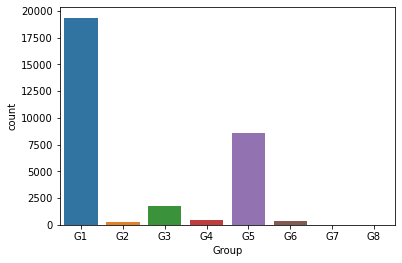

In [12]:
sns.countplot(x="Group",data=df)

<AxesSubplot:xlabel='Category', ylabel='count'>

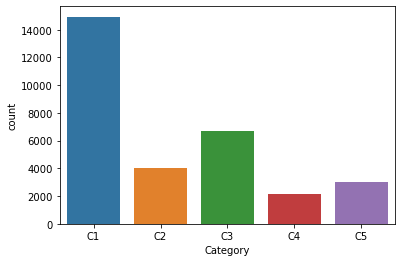

In [13]:
sns.countplot(x="Category",data=df)

<AxesSubplot:xlabel='Purchased_ABC_product', ylabel='count'>

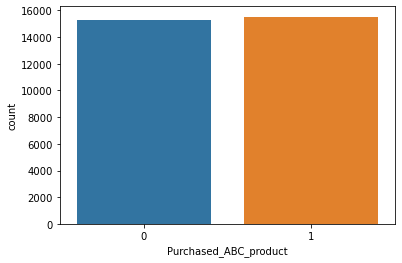

In [23]:
sns.countplot(x="Purchased_ABC_product",data=df)

<AxesSubplot:xlabel='Var1'>

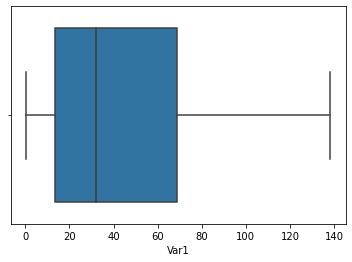

In [41]:
sns.boxplot(x="Var1",data=df)

<AxesSubplot:ylabel='Var2'>

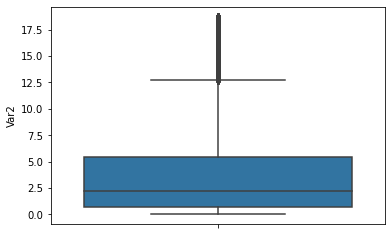

In [35]:
sns.boxplot(y="Var2",data=df)

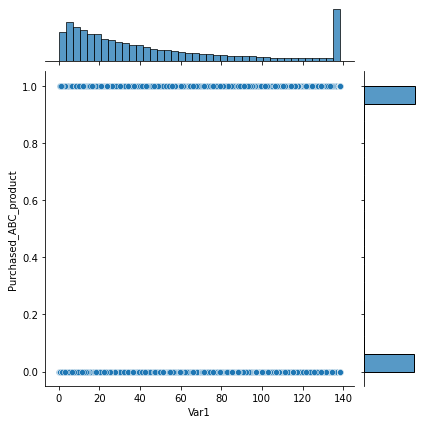

In [40]:
sns.jointplot(x="Var1",y="Purchased_ABC_product",data=df)

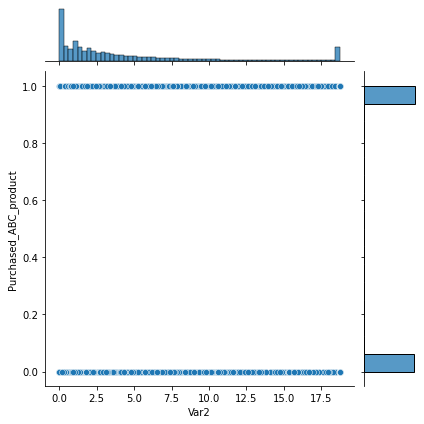

In [34]:
sns.jointplot(x="Var2",y="Purchased_ABC_product",data=df)

In [15]:
#OUTLIERS TREATMENT
np.percentile(df.Var1,[95])[0]

229.4234

In [31]:
np.percentile(df.Var2,[95])[0]

18.720999999999993

In [30]:
ul=np.percentile(df.Var2,[95])[0]

In [36]:
uv=np.percentile(df.Var1,[90])[0]

In [37]:
df[df.Var1>uv]

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
23,749060,185.1790,10.222,G1,C2,Gold,1
33,833226,229.4234,16.352,G3,C1,Gold,1
37,1229151,163.9870,7.071,G1,C2,Gold,1
44,1348404,193.8520,18.721,G1,C5,Silver,1
67,1914816,229.4234,10.561,G3,C2,Gold,1
...,...,...,...,...,...,...,...
30774,4460014,140.9450,11.152,G1,C2,Gold,1
30789,5439262,228.7420,10.614,G1,C1,Silver,1
30799,6491837,144.3830,6.202,G5,C2,Gold,1
30801,6547521,229.4234,18.721,G3,C2,Gold,1


In [32]:
df.Var2[df.Var2>ul]=ul

C:\Users\shaik\AppData\Local\Temp/ipykernel_12804/3699292660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Var2[df.Var2>ul]=ul


In [38]:
df.Var1[df.Var1>uv]=uv

C:\Users\shaik\AppData\Local\Temp/ipykernel_12804/1722700663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Var1[df.Var1>uv]=uv


In [43]:
#INTRODUCING DUMMIES
df=pd.get_dummies(df)

In [44]:
df.head()

,Customer_ID,Var1,Var2,Purchased_ABC_product,Group_G1,Group_G2,Group_G3,Group_G4,Group_G5,Group_G6,Group_G7,Group_G8,Category_C1,Category_C2,Category_C3,Category_C4,Category_C5,Rating_Bronze,Rating_Gold,Rating_Silver
0,5518,41.534,12.123,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,40515,9.445,0.256,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,52697,37.599,3.199,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,68202,81.514,1.645,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,130003,46.805,1.706,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [99]:
# DELETING NON-USABLE VARIABLES
del df['Category_C5']

KeyError: 'Category_C5'

In [46]:
del df['Group_G8']

In [49]:
del df['Customer_ID']

In [50]:
df.head()

,Var1,Var2,Purchased_ABC_product,Group_G1,Group_G2,Group_G3,Group_G4,Group_G5,Group_G6,Group_G7,Category_C1,Category_C2,Category_C3,Category_C4,Rating_Bronze,Rating_Gold,Rating_Silver
0,41.534,12.123,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,9.445,0.256,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,37.599,3.199,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,81.514,1.645,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,46.805,1.706,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [98]:
#CORRELATION MARTIX
df.corr()

,Var1,Purchased_ABC_product,Group_G1,Group_G2,Group_G3,Group_G4,Group_G5,Group_G6,Group_G7,Category_C1,Category_C2,Category_C3,Category_C4,Rating_Bronze,Rating_Gold,Rating_Silver
Var1,1.000000,0.455038,-0.057952,-0.053556,0.374250,-0.022113,-0.108587,-0.018079,0.002049,-0.344572,0.518138,-0.145368,-0.221089,-0.604718,0.687708,0.081748
Purchased_ABC_product,0.455038,1.000000,-0.069974,-0.034519,0.165655,-0.010723,0.003854,-0.014330,0.003544,-0.209266,0.213445,-0.054299,-0.105561,-0.337831,0.324612,0.094292
Group_G1,-0.057952,-0.069974,1.000000,-0.128404,-0.319995,-0.165856,-0.805670,-0.131416,-0.033933,0.092573,-0.028278,0.059709,-0.175570,-0.106989,-0.040801,0.147049
Group_G2,-0.053556,-0.034519,-0.128404,1.000000,-0.024324,-0.012608,-0.061243,-0.009990,-0.002579,-0.033405,-0.029467,-0.012721,0.140259,0.032349,-0.020274,-0.017850
Group_G3,0.374250,0.165655,-0.319995,-0.024324,1.000000,-0.031419,-0.152623,-0.024895,-0.006428,-0.173782,0.209978,-0.067170,-0.056709,-0.188551,0.373601,-0.104406
Group_G4,-0.022113,-0.010723,-0.165856,-0.012608,-0.031419,1.000000,-0.079106,-0.012903,-0.003332,0.012250,-0.014246,0.005966,-0.005739,0.029251,-0.025333,-0.010427
Group_G5,-0.108587,0.003854,-0.805670,-0.061243,-0.152623,-0.079106,1.000000,-0.062679,-0.016184,-0.007481,-0.064669,-0.031221,0.189478,0.193840,-0.130897,-0.099278
Group_G6,-0.018079,-0.014330,-0.131416,-0.009990,-0.024895,-0.012903,-0.062679,1.000000,-0.002640,0.012881,-0.010377,0.008737,-0.007485,0.010314,-0.029541,0.013142
Group_G7,0.002049,0.003544,-0.033933,-0.002579,-0.006428,-0.003332,-0.016184,-0.002640,1.000000,-0.005405,-0.006438,0.004313,-0.007173,0.006704,0.000753,-0.007743
Category_C1,-0.344572,-0.209266,0.092573,-0.033405,-0.173782,0.012250,-0.007481,0.012881,-0.005405,1.000000,-0.375935,-0.511111,-0.266324,0.261520,-0.315025,-0.020979


In [53]:
#LOGISTIC MODEL FITTING
x=df.loc[:, df.columns != 'Purchased_ABC_product']
y=df['Purchased_ABC_product']

In [55]:
model=LogisticRegression()
model.fit(x,y)
model.coef_

In [59]:
model.intercept_

array([0.06925082])

In [60]:
#FINDING PROBABILITIES FOR EACH CUSTOMER
model.predict_proba(x)

array([[0.04758402, 0.95241598],
       [0.79505365, 0.20494635],
       [0.46884503, 0.53115497],
       ...,
       [0.25626683, 0.74373317],
       [0.7533487 , 0.2466513 ],
       [0.76752521, 0.23247479]])

In [61]:
y_predict=model.predict(x)

In [62]:
y_predict

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [63]:
y_test_pred=lr.predict(x_test)

array([[12873,  2432],
       [ 5401, 10123]], dtype=int64)

In [67]:
y_test_pred=lr.predict(x_test)

In [69]:
 #CONFUSION MATRIX
con=confusion_matrix(y_test,y_test_pred)

In [70]:
con

array([[2637,  467],
       [1110, 1952]], dtype=int64)

In [71]:
#ACCURACY SCORE
accuracy_score(y_test,y_test_pred)

0.7442426208238728

In [74]:
#RECALL SCORE
recall_score(y_test,y_test_pred)

0.6374918354016982

In [75]:
#PRECISION SCORE
precision_score(y_test,y_test_pred)

0.8069450186027284

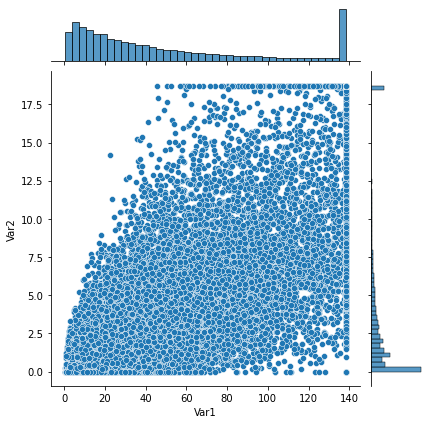

In [77]:
sns.jointplot(x='Var1',y='Var2',data=df)

In [81]:
#INFERENCES
#MULTYCOLLINIERITY
x=df['Var1']
y=df['Var2']

In [82]:
# CORRELATION BETWEEN VAR1,VAR2 IS HIGH.SO WE REMOVWE ONE VARIABLE
np.corrcoef(x,y)

array([[1.      , 0.819682],
       [0.819682, 1.      ]])

In [83]:
del df['Var2']

In [84]:
df.head()

,Var1,Purchased_ABC_product,Group_G1,Group_G2,Group_G3,Group_G4,Group_G5,Group_G6,Group_G7,Category_C1,Category_C2,Category_C3,Category_C4,Rating_Bronze,Rating_Gold,Rating_Silver
0,41.534,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,9.445,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,37.599,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,81.514,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,46.805,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [85]:
df.corr()


,Var1,Purchased_ABC_product,Group_G1,Group_G2,Group_G3,Group_G4,Group_G5,Group_G6,Group_G7,Category_C1,Category_C2,Category_C3,Category_C4,Rating_Bronze,Rating_Gold,Rating_Silver
Var1,1.000000,0.455038,-0.057952,-0.053556,0.374250,-0.022113,-0.108587,-0.018079,0.002049,-0.344572,0.518138,-0.145368,-0.221089,-0.604718,0.687708,0.081748
Purchased_ABC_product,0.455038,1.000000,-0.069974,-0.034519,0.165655,-0.010723,0.003854,-0.014330,0.003544,-0.209266,0.213445,-0.054299,-0.105561,-0.337831,0.324612,0.094292
Group_G1,-0.057952,-0.069974,1.000000,-0.128404,-0.319995,-0.165856,-0.805670,-0.131416,-0.033933,0.092573,-0.028278,0.059709,-0.175570,-0.106989,-0.040801,0.147049
Group_G2,-0.053556,-0.034519,-0.128404,1.000000,-0.024324,-0.012608,-0.061243,-0.009990,-0.002579,-0.033405,-0.029467,-0.012721,0.140259,0.032349,-0.020274,-0.017850
Group_G3,0.374250,0.165655,-0.319995,-0.024324,1.000000,-0.031419,-0.152623,-0.024895,-0.006428,-0.173782,0.209978,-0.067170,-0.056709,-0.188551,0.373601,-0.104406
Group_G4,-0.022113,-0.010723,-0.165856,-0.012608,-0.031419,1.000000,-0.079106,-0.012903,-0.003332,0.012250,-0.014246,0.005966,-0.005739,0.029251,-0.025333,-0.010427
Group_G5,-0.108587,0.003854,-0.805670,-0.061243,-0.152623,-0.079106,1.000000,-0.062679,-0.016184,-0.007481,-0.064669,-0.031221,0.189478,0.193840,-0.130897,-0.099278
Group_G6,-0.018079,-0.014330,-0.131416,-0.009990,-0.024895,-0.012903,-0.062679,1.000000,-0.002640,0.012881,-0.010377,0.008737,-0.007485,0.010314,-0.029541,0.013142
Group_G7,0.002049,0.003544,-0.033933,-0.002579,-0.006428,-0.003332,-0.016184,-0.002640,1.000000,-0.005405,-0.006438,0.004313,-0.007173,0.006704,0.000753,-0.007743
Category_C1,-0.344572,-0.209266,0.092573,-0.033405,-0.173782,0.012250,-0.007481,0.012881,-0.005405,1.000000,-0.375935,-0.511111,-0.266324,0.261520,-0.315025,-0.020979


In [89]:
x=df[['Var1']]
y=df['Purchased_ABC_product']

In [90]:
model=LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lr=LogisticRegression().fit(x_train,y_train)
y_test_pred=lr.predict(x_test)

con=confusion_matrix(y_test,y_test_pred)
con
accuracy_score(y_test,y_test_pred)


0.6921829386960753

In [95]:
precision_score(y_test,y_test_pred)

0.7431077694235589

In [96]:
recall_score(y_test,y_test_pred)

0.5809928151534944

In [104]:
#identifying the group to reach out to increase sale of ABC
a=df[['Group_G2']]
b=df['Purchased_ABC_product']
model=LogisticRegression().fit(a,b)

b_pred=model.predict(a)
con=confusion_matrix(b,b_pred)
con



array([[  200, 15105],
       [   98, 15426]], dtype=int64)

In [105]:
recall_score(b,b_pred)

0.9936871940221592

In [111]:
a=df[['Group_G7']]
b=df['Purchased_ABC_product']
model=LogisticRegression().fit(a,b)

b_pred=model.predict(a)
con=confusion_matrix(b,b_pred)
con

array([[    0, 15305],
       [    0, 15524]], dtype=int64)

In [107]:
recall_score(b,b_pred)

0.09533625354290132